In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# Features with nan values

features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
print(len(features_with_na))

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,3), '% missing values')

19
LotFrontage 17.74 % missing values
Alley 93.767 % missing values
MasVnrType 59.726 % missing values
MasVnrArea 0.548 % missing values
BsmtQual 2.534 % missing values
BsmtCond 2.534 % missing values
BsmtExposure 2.603 % missing values
BsmtFinType1 2.534 % missing values
BsmtFinType2 2.603 % missing values
Electrical 0.068 % missing values
FireplaceQu 47.26 % missing values
GarageType 5.548 % missing values
GarageYrBlt 5.548 % missing values
GarageFinish 5.548 % missing values
GarageQual 5.548 % missing values
GarageCond 5.548 % missing values
PoolQC 99.521 % missing values
Fence 80.753 % missing values
MiscFeature 96.301 % missing values


In [7]:
data.groupby('Alley')['SalePrice'].median()

NameError: name 'data' is not defined

In [ ]:
# Features have some missing values, whether that missing values has some dependencies?
# finding relationship between missing values and salesprice(output feature)

data = df.copy()

for feature in features_with_na:
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()
    

In [8]:
# Numerical Features

numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
len(numerical_features)

38

In [9]:
df[numerical_features].head()
# In numerical featurs we have some year field feature
# separating temopral features from numerical features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# Temporal Variable (Datetime variable)

year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

len(year_feature)

4

In [11]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

In [13]:
df.groupby('YrSold')['SalePrice'].median()

YrSold
2006    163995.0
2007    167000.0
2008    164000.0
2009    162000.0
2010    155000.0
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'House Price Vs Year Sold')

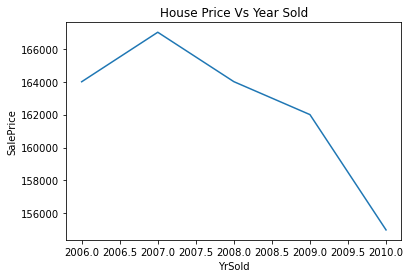

In [14]:
df.groupby('YrSold')['SalePrice'].median().plot()

plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.title('House Price Vs Year Sold')

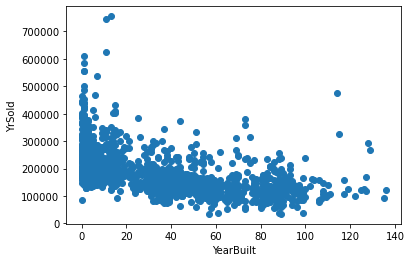

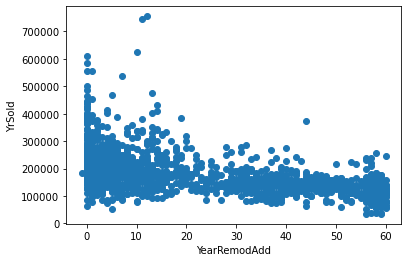

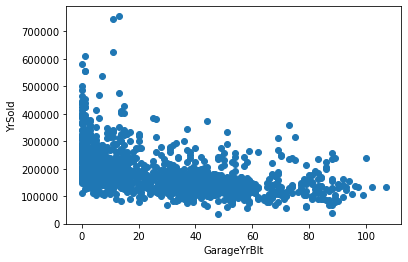

In [17]:
# Comparing all year features with salesPrice

data = df.copy()
for feature in year_feature:
    if feature!='YrSold':
        # Calculating the age of the house
        data[feature]= data['YrSold']-data[feature]   
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('YrSold')
        plt.show()

In [28]:
# Newer houses are more costlier than older houses

In [31]:
# Discreate Feature
# here kept 25 as a threshold
# 25 uniques values

discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
len(discrete_feature)

17

In [33]:
data.groupby(feature)['SalePrice'].median()

YrSold
2006    163995.0
2007    167000.0
2008    164000.0
2009    162000.0
2010    155000.0
Name: SalePrice, dtype: float64

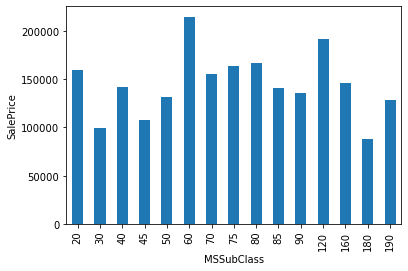

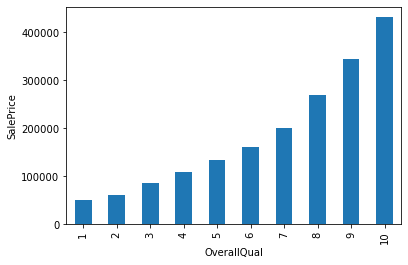

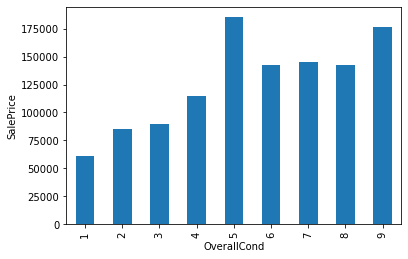

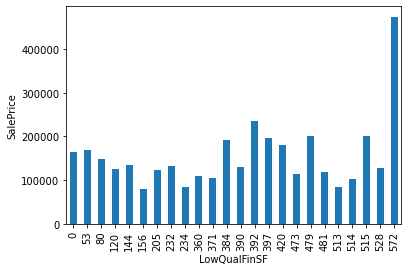

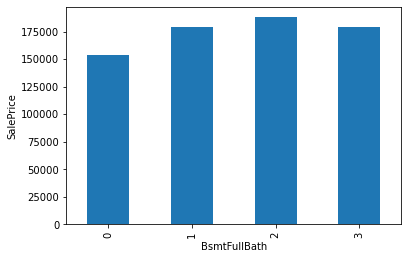

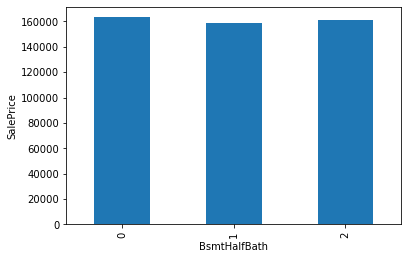

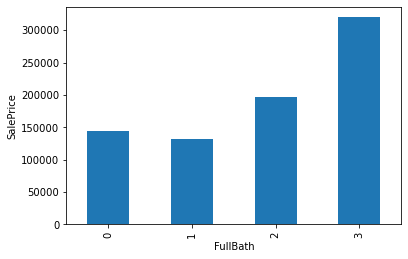

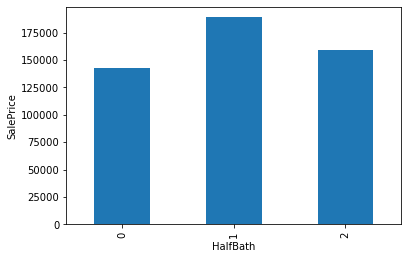

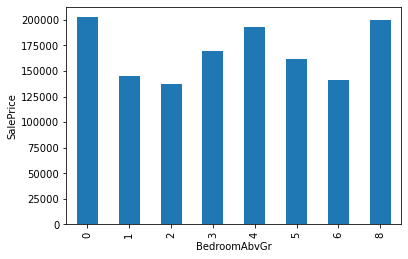

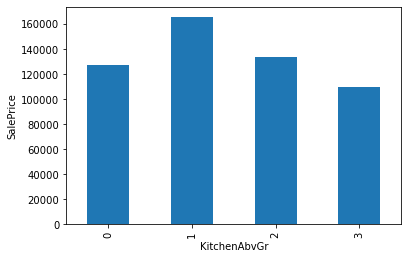

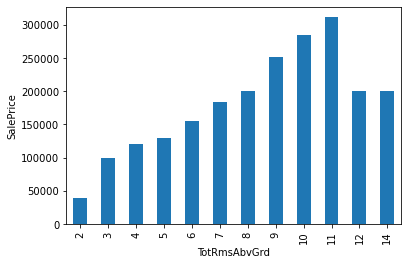

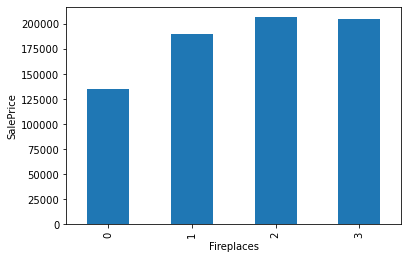

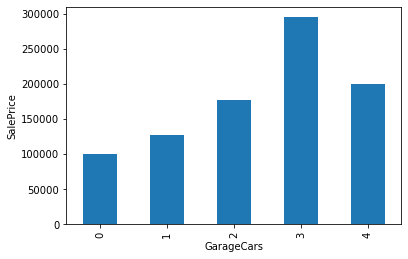

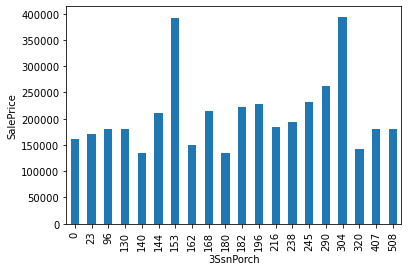

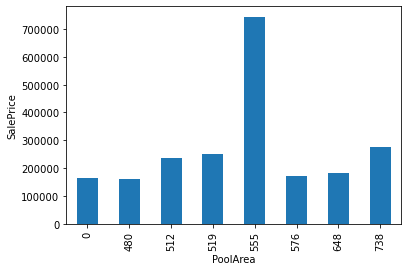

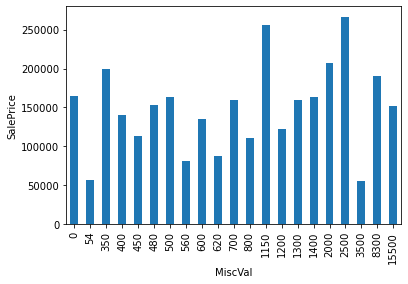

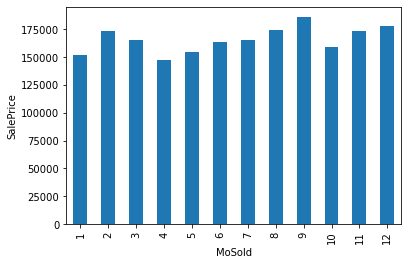

In [35]:
# Finding relationship between discreate feature and Salesprice

data = df.copy()

for feature in discrete_feature:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [45]:
# Continuous Features

continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + year_feature+['Id']]
len(continuous_feature)

16

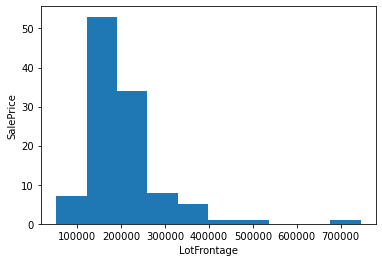

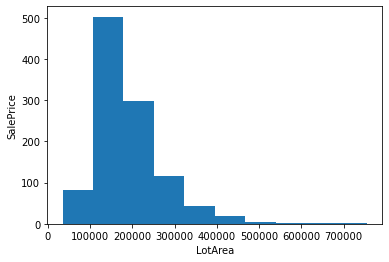

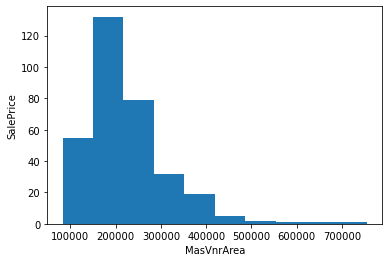

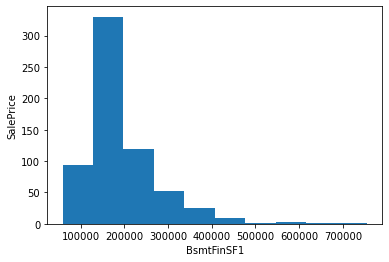

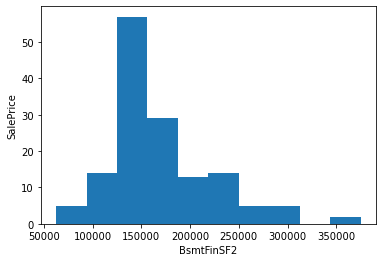

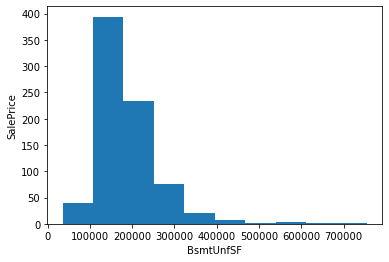

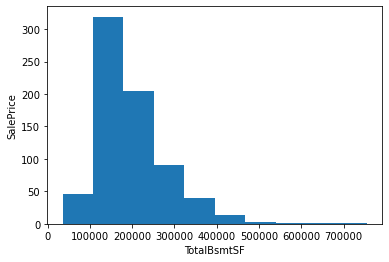

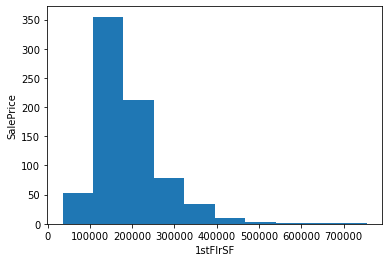

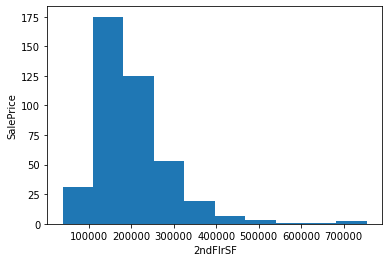

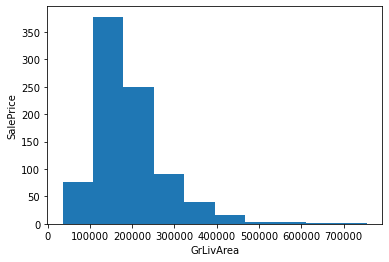

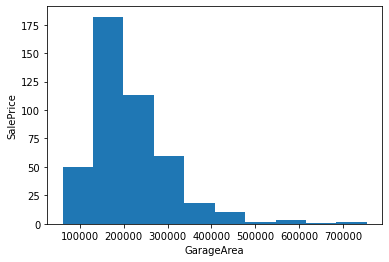

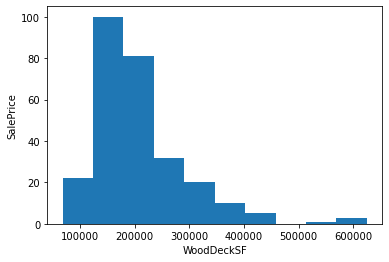

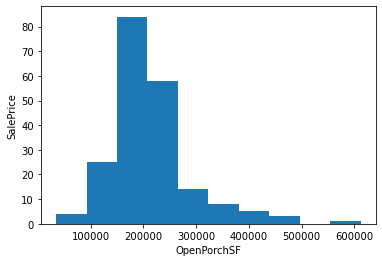

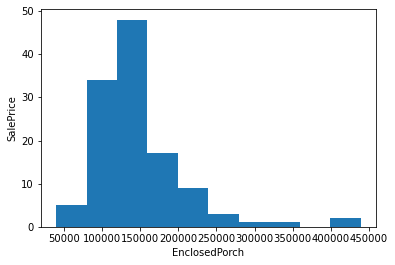

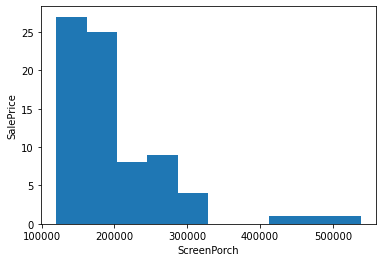

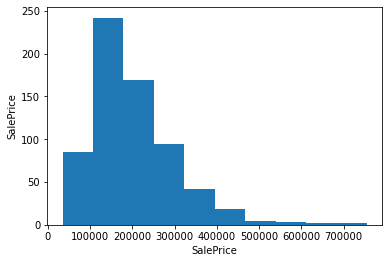

In [46]:
data = df.copy()

for feature in continuous_feature:
    data.groupby(feature)['SalePrice'].median().plot.hist()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

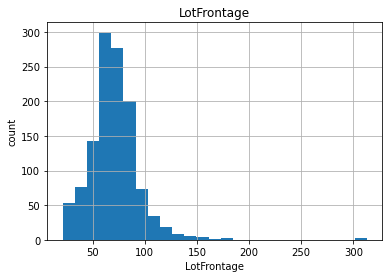

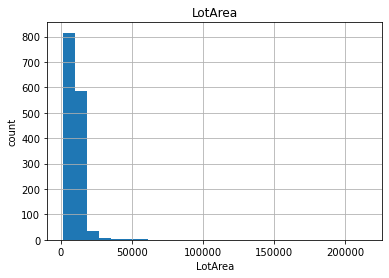

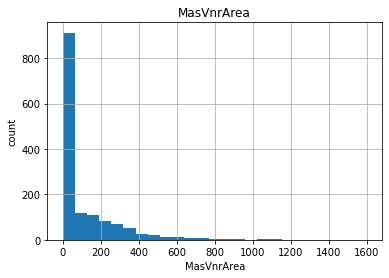

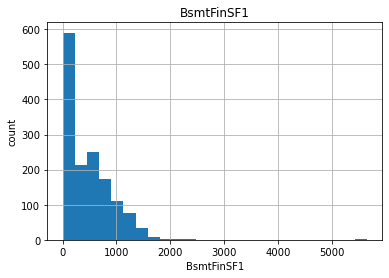

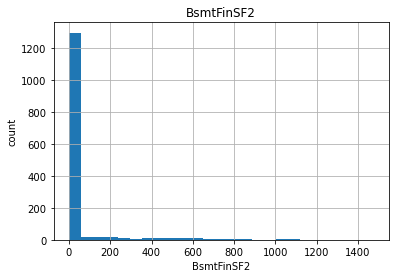

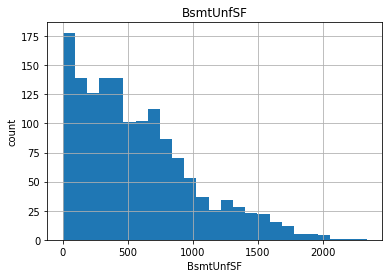

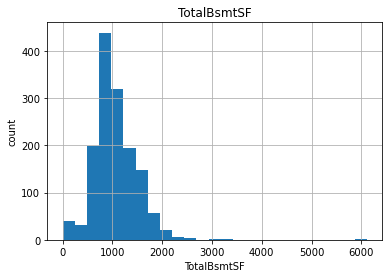

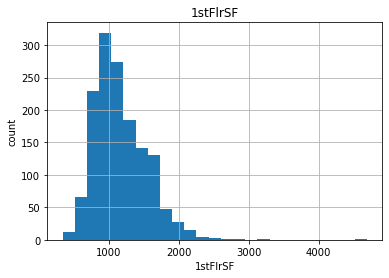

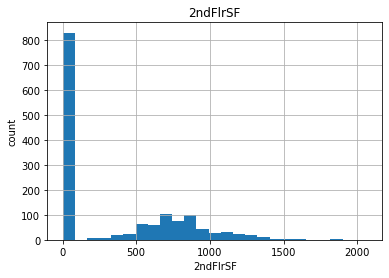

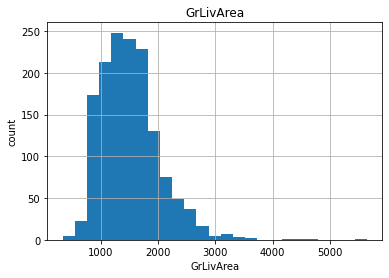

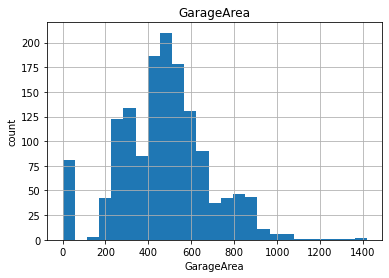

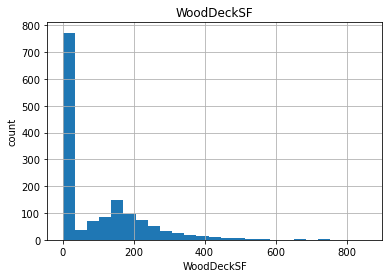

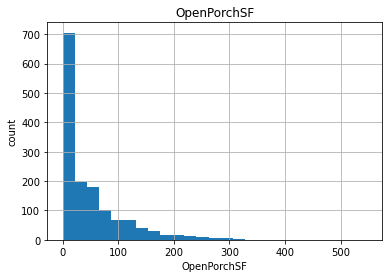

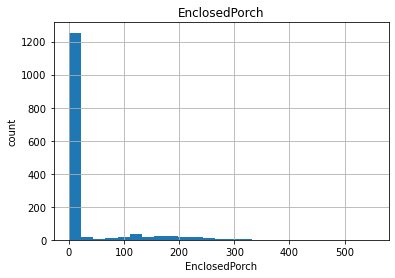

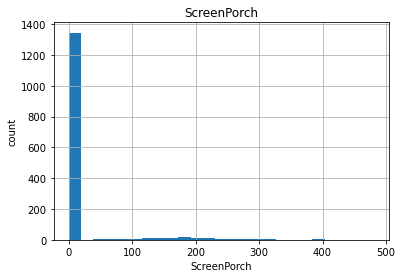

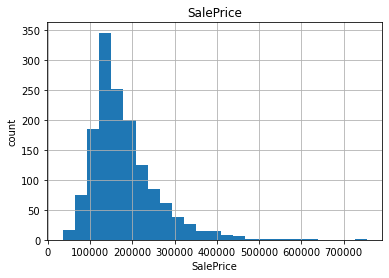

In [47]:
data = df.copy()

for feature in continuous_feature:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

LotFrontage


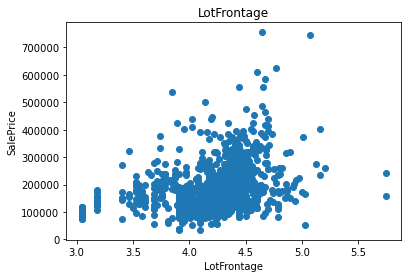

LotArea


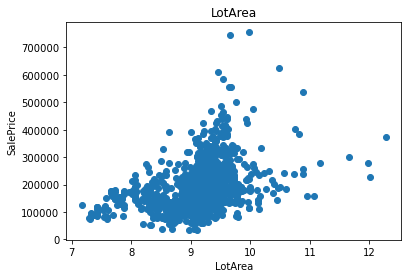

1stFlrSF


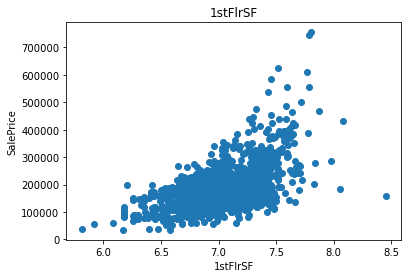

GrLivArea


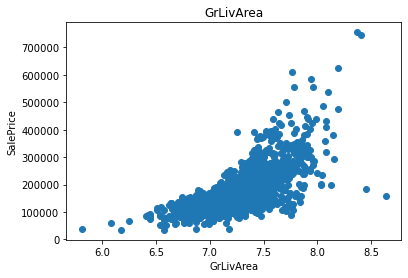

SalePrice


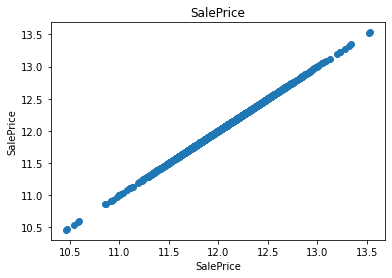

In [64]:
# Data is not normaly distibuted 
# Using Logarithmic transformation
data = df.copy()

# log[0] is undefined

for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    
    else:
        data[feature]= np.log(data[feature])
        #data['SalePrice']=np.log(data['SalePrice'])
        print(feature)
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

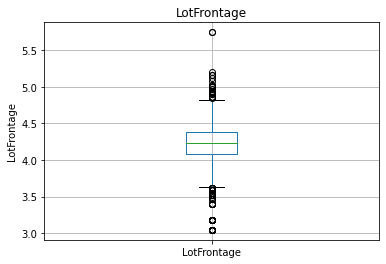

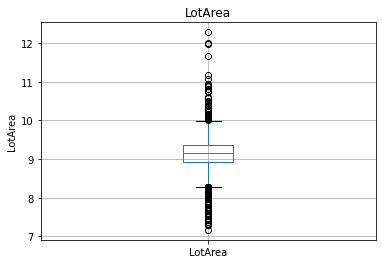

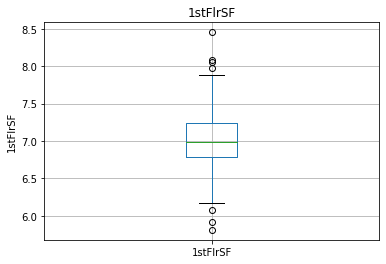

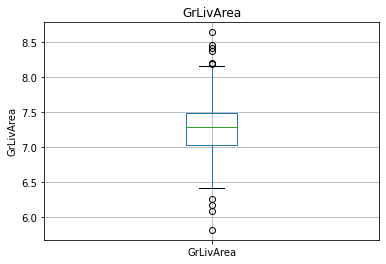

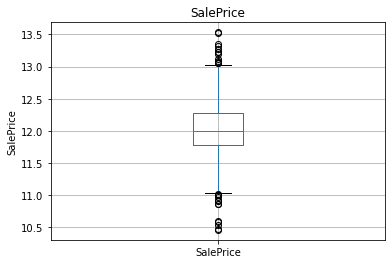

In [55]:
#  Outliers
data =df.copy()
for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    
    else:
        data[feature] =np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


In [59]:
# Categorical Variable

categorical_feature = [feature for feature in df.columns if df[feature].dtypes=='O']
len(categorical_feature)

43

In [62]:
# Finding how many unique categories have inside each feature

for feature in categorical_feature :
    print('feature name is {} and no of categories are {}'.format(feature, len(df[feature].unique())))


feature name is MSZoning and no of categories are 5
feature name is Street and no of categories are 2
feature name is Alley and no of categories are 3
feature name is LotShape and no of categories are 4
feature name is LandContour and no of categories are 4
feature name is Utilities and no of categories are 2
feature name is LotConfig and no of categories are 5
feature name is LandSlope and no of categories are 3
feature name is Neighborhood and no of categories are 25
feature name is Condition1 and no of categories are 9
feature name is Condition2 and no of categories are 8
feature name is BldgType and no of categories are 5
feature name is HouseStyle and no of categories are 8
feature name is RoofStyle and no of categories are 6
feature name is RoofMatl and no of categories are 8
feature name is Exterior1st and no of categories are 15
feature name is Exterior2nd and no of categories are 16
feature name is MasVnrType and no of categories are 4
feature name is ExterQual and no of categ

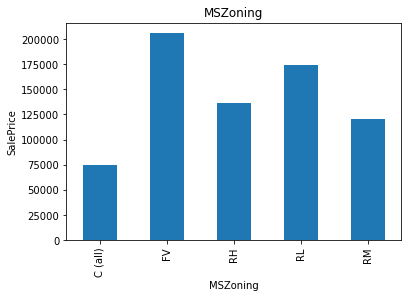

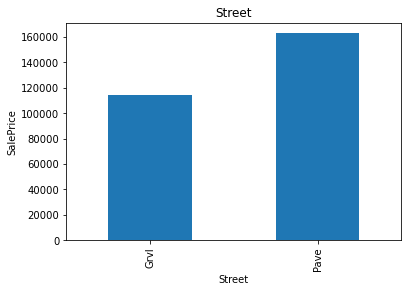

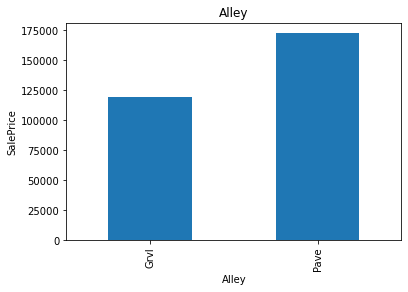

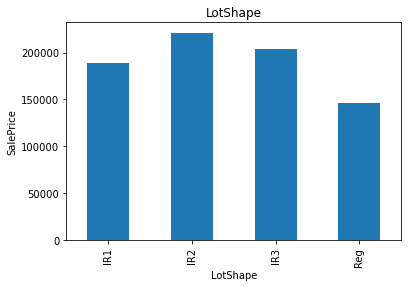

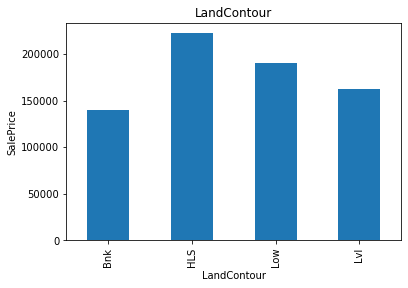

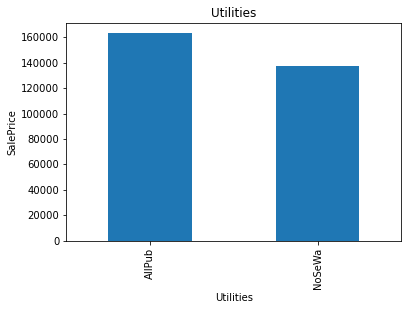

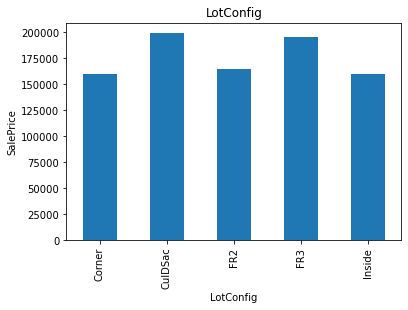

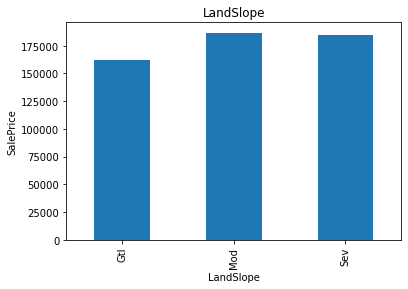

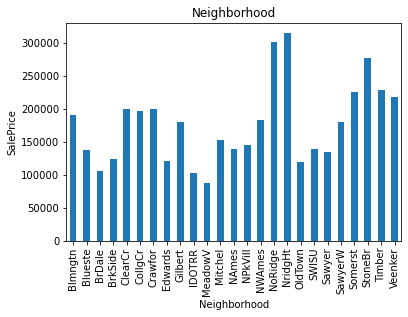

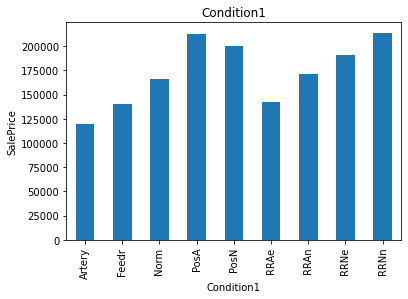

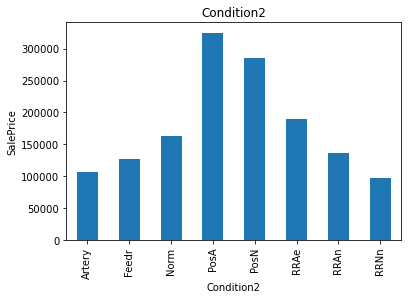

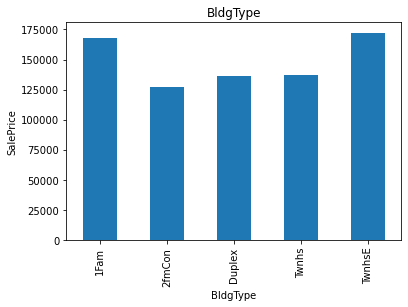

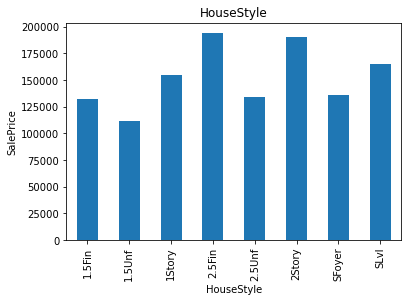

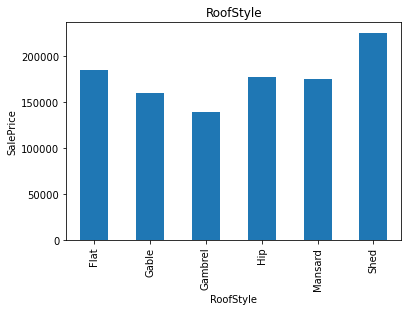

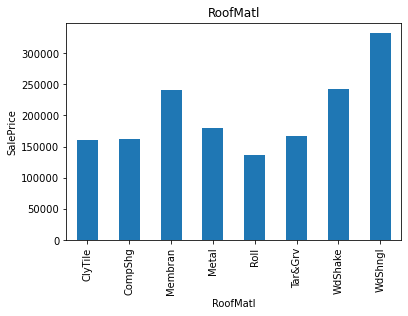

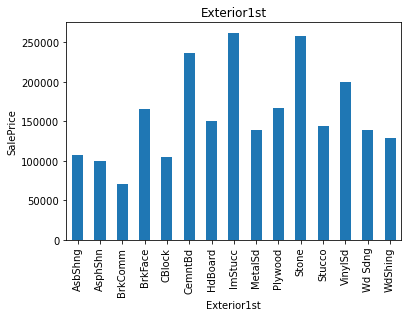

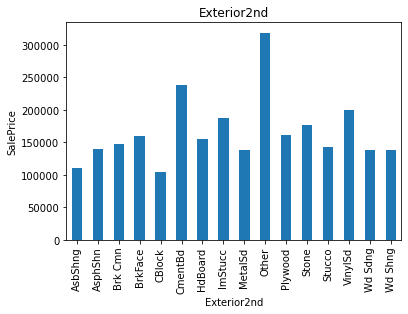

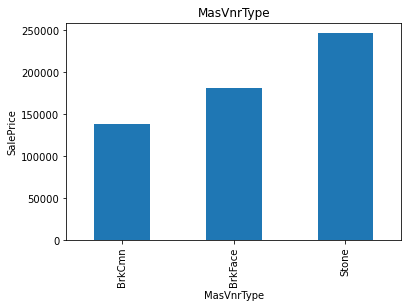

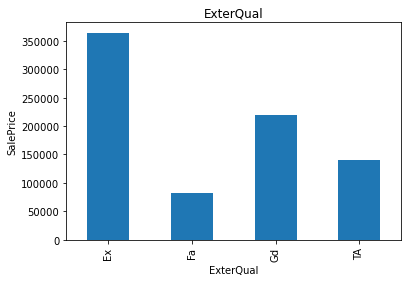

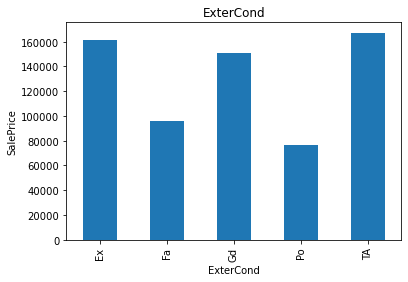

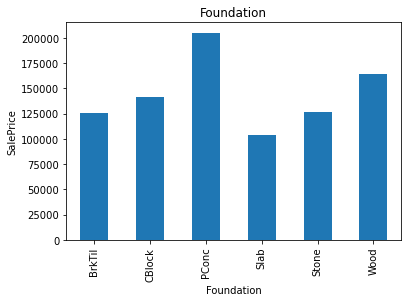

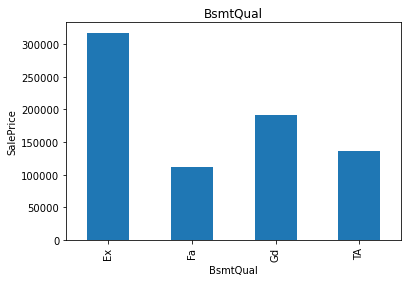

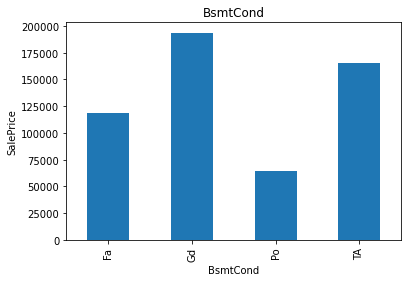

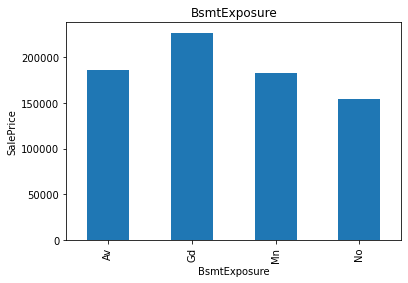

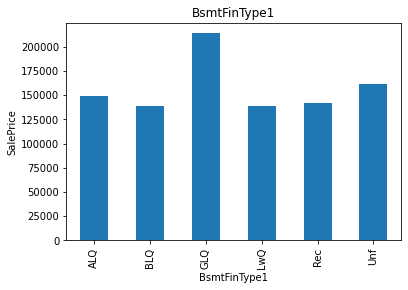

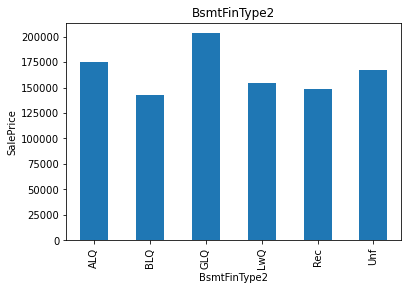

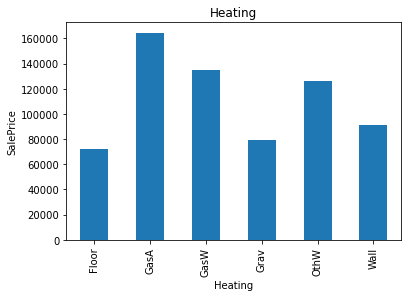

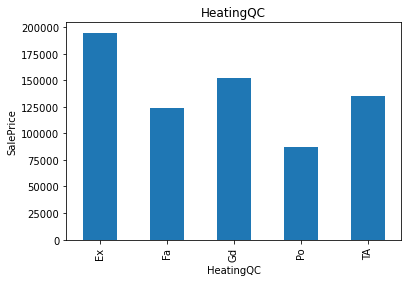

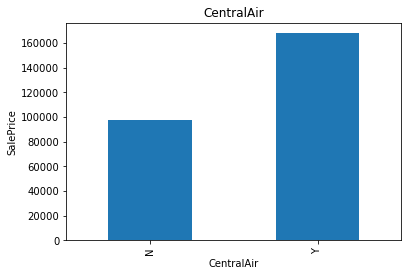

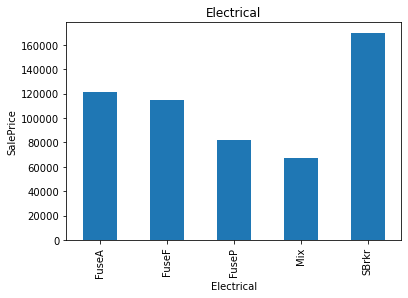

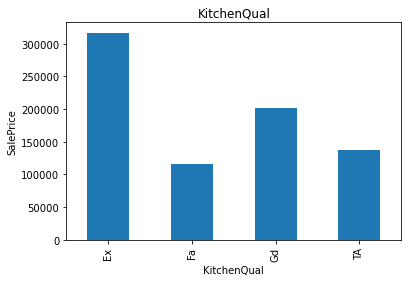

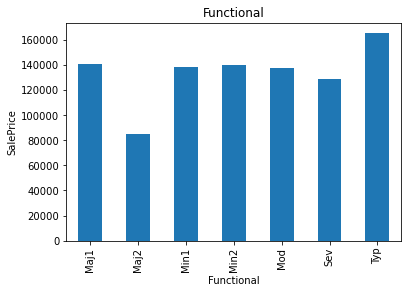

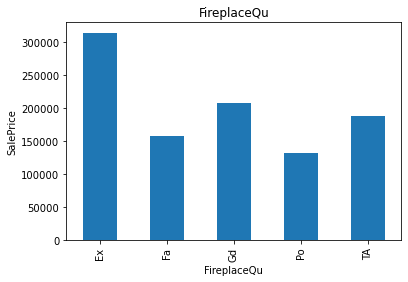

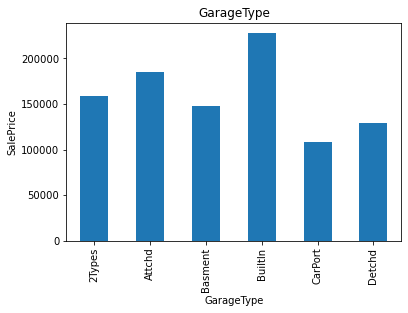

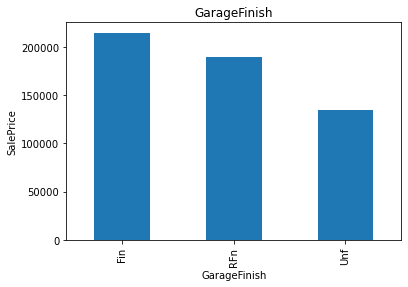

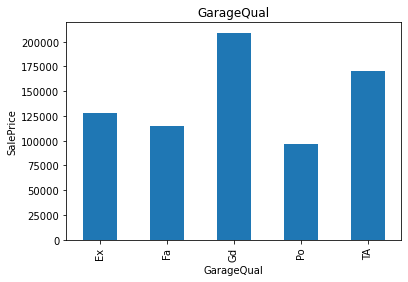

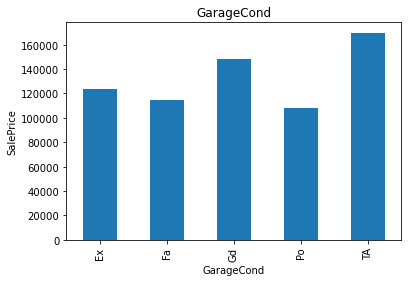

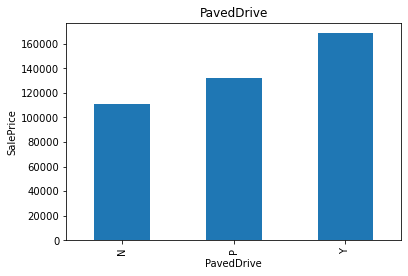

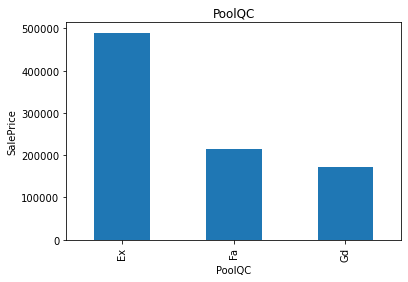

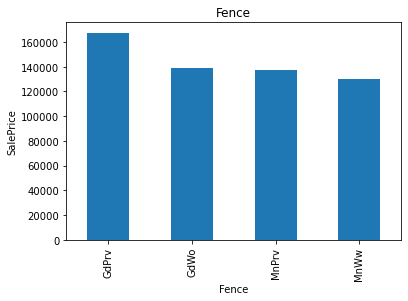

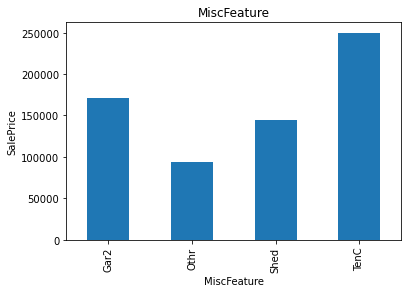

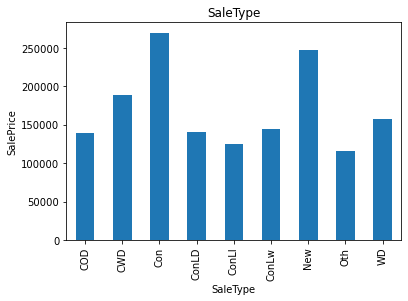

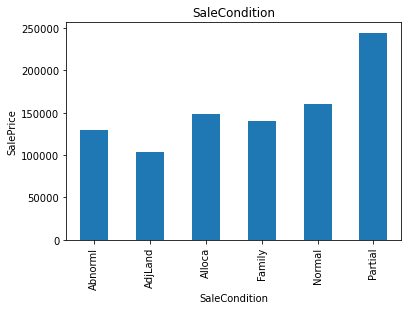

In [63]:
# Finding relationship between the categorical features and salesPRice
data = df.copy()

for feature in categorical_feature:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
